In [ ]:
# Draft code for making a 1D contrast curve for my Altair data, for R>lambda/D

# Created 2019 Nov. 25 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_file = "data/test_csv_file_all_iterations_20200210_run_01.csv"

In [3]:
# read in csv of detection info
info_file = pd.read_csv(csv_file)

In [14]:
info_file["rad_asec"].dropna()

0      0.2
1      1.4
2      1.6
3      0.6
4      0.3
      ... 
914    0.3
915    0.3
916    0.3
917    0.3
918    0.3
Name: rad_asec, Length: 919, dtype: float64

In [16]:
# 1. Consider only the rows corresponding to the most recent injection iteration 
#     for each combination of (radius, azimuth, starting amplitude).
# 2. For each radius, find median value of amplitude across all azimuth and 
#     starting amplitude.

# find unique combinations of (radius, azimuth, starting amplitude)
info_file_grouped_rad_ampl_ampl0 = info_file.drop_duplicates(subset=["rad_asec", 
                                                                     "angle_deg", 
                                                                     "ampl_linear_norm_0"])

In [15]:
info_file_grouped_rad_ampl_ampl0

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
0,0,0.001,0.001,120.0,25968.365151,0,NaN,NaN,12.310971,0.2,NaN,3.850906,47.408389
1,1,0.001,0.001,0.0,25968.365151,0,NaN,NaN,2.235944,1.4,NaN,12.140274,27.144977
2,2,0.001,0.001,240.0,25968.365151,0,NaN,NaN,2.188794,1.6,NaN,12.716245,27.833238
3,3,0.001,0.001,0.0,25968.365151,0,NaN,NaN,3.439627,0.6,NaN,6.736536,23.171170
4,4,0.001,0.001,0.0,25968.365151,0,NaN,NaN,3.820972,0.3,NaN,5.094128,19.464518
5,5,0.001,0.001,120.0,25968.365151,0,NaN,NaN,2.227405,1.6,NaN,12.607291,28.081543
6,6,0.001,0.001,240.0,25968.365151,0,NaN,NaN,2.817502,0.5,NaN,7.121259,20.064160
7,7,0.001,0.001,120.0,25968.365151,0,NaN,NaN,3.557954,0.6,NaN,6.503144,23.137888
8,8,0.001,0.001,0.0,25968.365151,0,NaN,NaN,2.627925,1.0,NaN,9.476147,24.902607
9,9,0.001,0.001,240.0,25968.365151,0,NaN,NaN,2.333510,1.2,NaN,10.986375,25.636815


In [17]:
# initialize a dataframe for containing the most recent injections

df_recent = pd.DataFrame(columns=list(info_file_grouped_rad_ampl_ampl0.keys()))

In [18]:
for combo_num in range(0,len(info_file_grouped_rad_ampl_ampl0)):
    # loop over each combination of (radius, azimuth, starting amplitude)

    info_file_unique_combo = info_file.where(np.logical_and(np.logical_and(info_file["rad_asec"] == 
                          info_file_grouped_rad_ampl_ampl0["rad_asec"].iloc[combo_num],
                   info_file["angle_deg"] == 
                          info_file_grouped_rad_ampl_ampl0["angle_deg"].iloc[combo_num]),
                   info_file["ampl_linear_norm_0"] == 
                       info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].iloc[combo_num])).dropna(how="all")
    
    for starting_ampl_num in range(0,len(info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].unique())):
        # loop over all starting amplitudes
        
        this_ampl = info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].unique()[starting_ampl_num]
        
        info_file_unique_combo_ampl0 = info_file_unique_combo.where(info_file_unique_combo["ampl_linear_norm_0"] == 
                                                                    this_ampl)
            
        # take the row corresponding to the last injection iteration, for THIS starting amplitude
        info_file_unique_combo_ampl0_recent = info_file_unique_combo_ampl0.where(info_file_unique_combo_ampl0["inject_iteration"] == 
                                                                                 np.nanmax(info_file_unique_combo_ampl0["inject_iteration"])).dropna(how="all")
        
        # paste this row into the 'new' dataframe 
        df_recent = df_recent.append(info_file_unique_combo_ampl0_recent, sort=True)

In [19]:
df_recent

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
844,844.0,0.005188,0.001,120.0,25968.365151,28.0,-1.000000e-08,1.000000e-08,13.807718,0.2,18.691589,4.999997,69.038556
872,872.0,0.000425,0.001,0.0,25968.365151,31.0,1.000000e-08,1.000000e-08,1.847409,1.4,130.841121,5.000114,9.237253
798,798.0,0.000445,0.001,240.0,25968.365151,25.0,1.000000e-08,1.000000e-08,1.692445,1.6,149.532710,5.000079,8.462359
752,752.0,0.000911,0.001,0.0,25968.365151,23.0,1.000000e-08,1.000000e-08,3.312625,0.6,56.074766,5.000017,16.563183
918,918.0,0.003640,0.001,0.0,25968.365151,55.0,1.000000e-08,1.000000e-08,11.550362,0.3,28.037383,5.000001,57.751818
726,726.0,0.000265,0.001,120.0,25968.365151,22.0,1.000000e-08,1.000000e-08,1.647957,1.6,149.532710,5.000111,8.239969
857,857.0,0.001454,0.001,240.0,25968.365151,29.0,1.000000e-08,1.000000e-08,5.475700,0.5,46.728972,5.000011,27.378560
728,728.0,0.000795,0.001,120.0,25968.365151,22.0,1.000000e-08,1.000000e-08,2.925234,0.6,56.074766,5.000012,14.626201
666,666.0,0.000276,0.001,0.0,25968.365151,20.0,1.000000e-08,1.000000e-08,1.528380,1.0,93.457944,5.000120,7.642081
801,801.0,0.000377,0.001,240.0,25968.365151,25.0,1.000000e-08,1.000000e-08,1.798310,1.2,112.149533,5.000082,8.991697


In [20]:
# among the rows in the 'new' dataframe, take the median at each radius

contrast_curve = df_recent.groupby(["rad_asec"], axis=0, as_index=False).median()

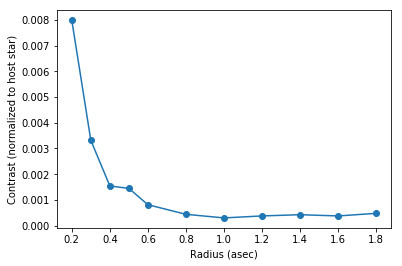

In [24]:
plt.plot(contrast_curve["rad_asec"],contrast_curve["ampl_linear_norm"],marker="o")
plt.xlabel("Radius (asec)")
plt.ylabel("Contrast (normalized to host star)")
plt.savefig("junk.pdf")

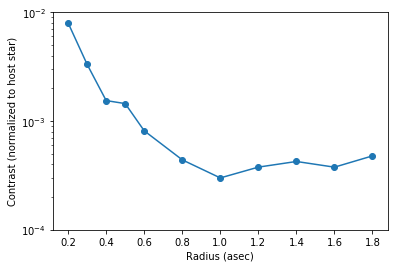

In [26]:
plt.plot(contrast_curve["rad_asec"],contrast_curve["ampl_linear_norm"],marker="o")
plt.xlabel("Radius (asec)")
plt.ylabel("Contrast (normalized to host star)")
plt.yscale('log')
plt.ylim([0.0001,0.01])
plt.savefig("junk.pdf")
#plt.show()

In [23]:
contrast_curve["ampl_linear_norm_0"].values

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001])

In [ ]:
# write out to csv
file_name_cc = config["data_dirs"]["DIR_S2N"] + config["file_names"]["CONTCURV_CSV"]
contrast_curve_pd.to_csv(file_name_cc, sep = ",", columns = ["rad_asec","ampl_linear_norm"])
print("Wrote out contrast curve CSV to " + file_name_cc)

# make plot
print(contrast_curve_pd)
file_name_cc_plot = config["data_dirs"]["DIR_FYI_INFO"] + config["file_names"]["CONTCURV_PLOT"]
plt.plot(contrast_curve_pd["rad_asec"],contrast_curve_pd["ampl_linear_norm"])
plt.xlabel("Radius from host star (asec)")
plt.ylabel("Min. companion amplitude with S/N > threshhold")
plt.savefig(file_name_cc_plot)
plt.clf()
print("Wrote out contast curve plot to " + file_name_cc_plot)